# Analyse coexpression with MCODE
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cytoscape/cytoscape-automation/new/master/for-scripters/Python/analyse_coexp_with_mcode.ipynb)

**Yasir Demirtaş, Kozo Nishida, Barry Demchak**

**py4cytoscape 0.0.11**

## Prerequisites
In addition to this package (py4cytoscape), you will need:

- Cytoscape 3.8 or greater, which can be downloaded from https://cytoscape.org/download.html. Simply follow the installation instructions on screen.
- Complete installation wizard
- Launch Cytoscape
- If your Cytoscape is 3.8.2 or earlier, install **FileTransfer App** (Follow [here](https://py4cytoscape.readthedocs.io/en/0.0.10/tutorials/index.html) to do it.)

**NOTE: To run this notebook, you must manually start Cytoscape first – don’t proceed until you have started Cytoscape.**

### Setup required only in a remote notebook environment

If you’re using a remote Jupyter Notebook environment such as Google Colab, run the cell below. (If you’re running a local Jupyter Notebook server on the desktop machine same with Cytoscape, you don’t need to do that.)

(Note that to use the current py4cytoscape release (instead of v0.0.11), remove the _PY4CYTOSCAPE= line in the snippet below.)


In [1]:
_PY4CYTOSCAPE = 'git+https://github.com/cytoscape/py4cytoscape@0.0.11'
import requests
exec(requests.get("https://raw.githubusercontent.com/cytoscape/jupyter-bridge/master/client/p4c_init.py").text)
IPython.display.Javascript(_PY4CYTOSCAPE_BROWSER_CLIENT_JS) # Start browser client

  Cloning https://github.com/cytoscape/py4cytoscape (to revision 0.0.11) to /tmp/pip-req-build-3g5792n9


  Running command git clone -q https://github.com/cytoscape/py4cytoscape /tmp/pip-req-build-3g5792n9
  Running command git checkout -b 0.0.11 --track origin/0.0.11
  Switched to a new branch '0.0.11'
  Branch '0.0.11' set up to track remote branch '0.0.11' from 'origin'.


  Created wheel for py4cytoscape: filename=py4cytoscape-0.0.11-py3-none-any.whl size=159396 sha256=22027916c1648ecce03f7711cfc08ad5cb65eac3041aa3fc88e1eb11aefb7015
  Stored in directory: /tmp/pip-ephem-wheel-cache-5fw2l66k/wheels/07/82/a1/94122065caf1c697891340d02661b7b47a82e2d8af2477dd84
Successfully built py4cytoscape
Loading Javascript client ... 8028b9f5-f88d-4e08-9596-a107d4b31c3a on https://jupyter-bridge.cytoscape.org
ADVICE: WHEN RUNNING UNDER COLAB, DO NOT RE-RUN THIS CELL WITHOUT MANUALLY EXECUTING Runtime | Factory Reset Runtime FROM THE COLAB MENU FIRST.


<IPython.core.display.Javascript object>

In [2]:
!pip install concurrent-log-handler
!pip install openpyxl

In [61]:
import py4cytoscape as p4c
import pandas as pd
import os
import uuid
from logging import getLogger, INFO
from concurrent_log_handler import ConcurrentRotatingFileHandler
from IPython.display import Image
from time import sleep
%config InlineBackend.figure_format = 'svg'

In [62]:
p4c.cytoscape_version_info()

{'apiVersion': 'v1',
 'cytoscapeVersion': '3.8.2',
 'automationAPIVersion': '1.3.0',
 'py4cytoscapeVersion': '0.0.11'}

In [63]:
p4c.install_app('MCODE')

{}


{}

## Clear all networks at the begining

In [66]:
p4c.session.close_session(False)

{}

## Import Co-Exp Data and Rename columns

In [67]:
results = pd.read_excel('https://github.com/cytoscape/py4cytoscape/raw/0.0.11/doc/tutorials/input_data/co_exp_result.xlsx')

In [68]:
results

,gene1,gene2,score
0,ACSM3,COL6A2,-0.518721
1,ACSM3,DPYSL3,-0.504664
2,ACSM3,THY1,-0.494217
3,ADAM28,AL928768.3 /// Ig alpha 1-[alpha]2m /// IGH,0.553792
4,ADH1B,BUB1B,-0.565257
...,...,...,...
1117,THBS2,THY1,0.691359
1118,THBS2,VCAN,0.630551
1119,THBS4,THY1,0.530471
1120,THY1,VCAN,0.510101


In [69]:
results = results.rename(columns={'gene1': 'source', 'gene2': 'target'})

In [70]:
results

,source,target,score
0,ACSM3,COL6A2,-0.518721
1,ACSM3,DPYSL3,-0.504664
2,ACSM3,THY1,-0.494217
3,ADAM28,AL928768.3 /// Ig alpha 1-[alpha]2m /// IGH,0.553792
4,ADH1B,BUB1B,-0.565257
...,...,...,...
1117,THBS2,THY1,0.691359
1118,THBS2,VCAN,0.630551
1119,THBS4,THY1,0.530471
1120,THY1,VCAN,0.510101


## Create network with co-exp data and give random network name

In [71]:
network_name = uuid.uuid4().hex
network_suid = p4c.networks.create_network_from_data_frames(
    edges=results, 
    title= network_name,
    collection= network_name + '_collection'
)

Applying default style...
Applying preferred layout


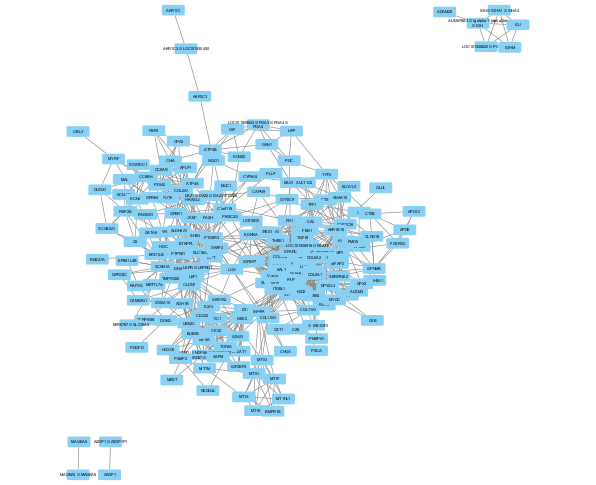

In [72]:
p4c.notebook_export_show_image()

## Run analyze command so your network will be one way directed

In [73]:
p4c.commands.commands_post('analyzer/version')

{'version': '4.4.8'}

In [74]:
analyze = p4c.commands.commands_post('analyzer/analyze')

In [75]:
analyze

{'networkTitle': 'd91589510bdd4df785c3d0c72d1dc166 (undirected)',
 'nodeCount': '197',
 'edgeCount': '1122',
 'avNeighbors': '11.86096256684492',
 'diameter': '8',
 'radius': '5',
 'avSpl': '3.271634753608188',
 'cc': '0.5249889291420875',
 'density': '0.06376861595077914',
 'heterogeneity': '0.8353654292197396',
 'centralization': '0.16378959604766055',
 'ncc': '4',
 'time': '0.03'}

## Run mcode command with options (you can change network settings)

In [76]:
p4c.commands.commands_help('mcode')

['cluster', 'view']

In [77]:
p4c.commands.commands_help('mcode cluster')

['degreeCutoff',
 'fluff',
 'fluffNodeDensityCutoff',
 'haircut',
 'includeLoops',
 'kCore',
 'maxDepthFromStart',
 'network',
 'nodeScoreCutoff',
 'scope']

In [78]:
mcode = p4c.commands.commands_post('mcode cluster degreeCutoff=2 fluff=false fluffNodeDensityCutoff=0.1 haircut=true includeLoops=false kCore=2 maxDepthFromStart=100 network=current nodeScoreCutoff=0.2 scope=NETWORK')
sleep(5)

In [79]:
mcode

{'id': 1,
 'parameters': {'scope': 'NETWORK',
  'includeLoops': False,
  'degreeCutoff': 2,
  'kCore': 2,
  'maxDepthFromStart': 100,
  'nodeScoreCutoff': 0.2,
  'haircut': True,
  'fluff': False,
  'fluffNodeDensityCutoff': 0.1,
  'selectedNodes': []},
 'clusters': [{'rank': 0,
   'name': 'Cluster 0',
   'score': 17.263157894736842,
   'seedNode': 3963,
   'nodes': [3906,
    3908,
    4004,
    3941,
    3911,
    3914,
    3915,
    3918,
    3920,
    3889,
    3921,
    3923,
    3924,
    3925,
    4021,
    3927,
    3928,
    3930,
    3931,
    3963]},
  {'rank': 0,
   'name': 'Cluster 0',
   'score': 9.916666666666666,
   'seedNode': 3968,
   'nodes': [3904,
    3968,
    3905,
    3907,
    3909,
    3912,
    3913,
    3916,
    3917,
    3919,
    3929,
    3933,
    3997,
    3998,
    3999,
    4001,
    4002,
    3939,
    4003,
    3887,
    3951,
    3893,
    3894,
    3895,
    3899]},
  {'rank': 0,
   'name': 'Cluster 0',
   'score': 8.842105263157894,
   'seedNode

### Mcode created clusters, we need big clusters which is node count bigger than 20 (you can change threshold)

In [80]:
big_clusters = [i for i in range(len(mcode['clusters'])) if len(mcode['clusters'][i]['nodes']) >= 20]

In [81]:
big_clusters

[0, 1, 2]

### Create empty list and append cluster tables to in it
#### Create cluster images as a png and network file as a .cyjs so you are able to use in cytoscape.js

In [82]:
p4c.get_table_column_names()

['SUID',
 'shared name',
 'name',
 'selected',
 'id',
 'AverageShortestPathLength',
 'ClusteringCoefficient',
 'ClosenessCentrality',
 'IsSingleNode',
 'PartnerOfMultiEdgedNodePairs',
 'SelfLoops',
 'Eccentricity',
 'Stress',
 'Degree',
 'BetweennessCentrality',
 'NeighborhoodConnectivity',
 'NumberOfDirectedEdges',
 'NumberOfUndirectedEdges',
 'Radiality',
 'TopologicalCoefficient',
 'MCODE::Score (1)',
 'MCODE::Node Status (1)',
 'MCODE::Clusters (1)']

In [83]:
clusters = []
img_names = []
for i in range(len(big_clusters)):
    view_id = p4c.commands.commands_post('mcode view id=1 rank=' + str(i+1) )
    clusters.append(p4c.tables.get_table_columns() \
                  .drop(columns=['id','name','selected','MCODE::Clusters (1)','SUID']) \
                  .sort_values(by=['MCODE::Score (1)'], ascending=False) \
                 .reset_index(drop=True) )
    
    p4c.network_views.get_network_view_suid()
    img_name = uuid.uuid4().hex
    p4c.export_image(str(img_name))
    p4c.export_network(img_name,'cyjs')
    img_names.append(img_name+'.png')

In [84]:
img_names

['adf62ca4886248228abdcca71e0477d4.png',
 '8b97eebbcf874104b009b27af429ee7c.png',
 'c04e8386ba944ab7bb2364227dbb6eea.png']

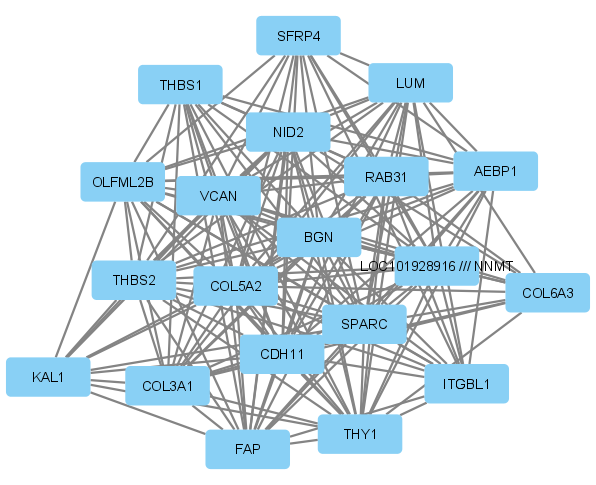

In [85]:
p4c.notebook_show_image(img_names[0])

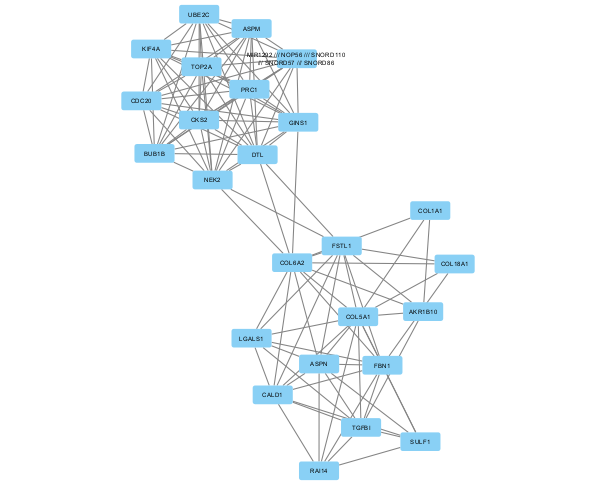

In [86]:
p4c.notebook_show_image(img_names[1])

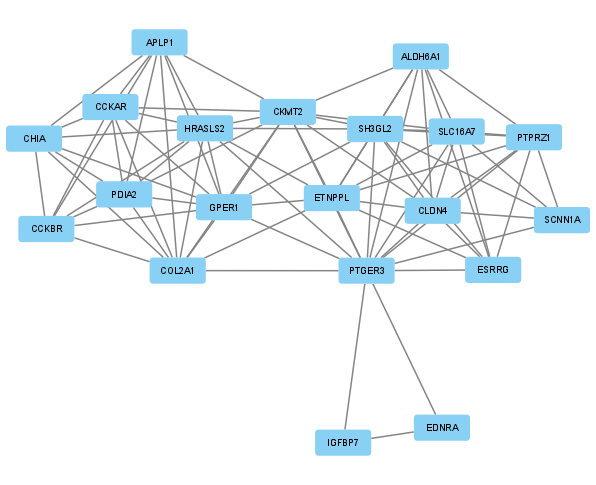

In [87]:
p4c.notebook_show_image(img_names[2])